In [3]:
import numpy as np # features for operations on n-arrays and matrices
import pandas as pd # features for data structure
import matplotlib.pyplot as plt # Generatiing graph and visualizations
import math # features for mathematical operations
import cv2 # Computer vision for image processing - OPENCV
from glob import glob # Used for file operation
import itertools # Efficient looping

# Keras library for building Neural Networks 
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,CSVLogger

# Sklearn for image processing and machine learning facilitation
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Global Variables
scale = 70 # initial scale in pixel


/Users/apple/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/apple/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [5]:
#Set the path of data location in the directory
training_path = '/Users/apple/Documents/SEM2 2018/Big Data n Project/Project 2/Image Classifier/train/*/*.png'
images = glob(training_path)

#set an empty array to restore the data
training_images = []
training_labels = []
#set the number of images in training data
num = len(images)
count = 1

#Read the images and change the size into 70 x 70
for i in images:
    print(str(count)+'/'+str(num),end='\r')
    # Get image (with resizing)
    training_images.append(cv2.resize(cv2.imread(i),(scale,scale)))
    # Get the label of the image (classes/folder name)
    training_labels.append(i.split('/')[-2])
    count=count+1
training_images = np.asarray(training_images) # Training dataset
training_labels = pd.DataFrame(training_labels) # Train labels set

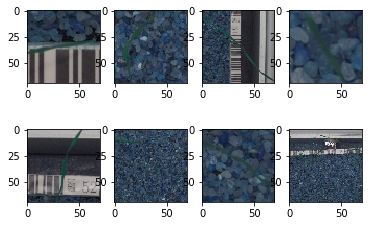

In [6]:
# Print out some images as examples
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(training_images[i])

In [8]:
# Label encoding for the training labels (1 for true and 0 for false)
labels = preprocessing.LabelEncoder()
labels.fit(training_labels[0])
print('Classes: '+str(labels.classes_))
encodedlabels = labels.transform(training_labels[0])

# Make labels categorical
clear_labels = np_utils.to_categorical(encodedlabels)
classes = clear_labels.shape[1]
nClasses = str(classes)
print("The Number of classes: " + nClasses)

Classes: ['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']
The Number of classes: 12


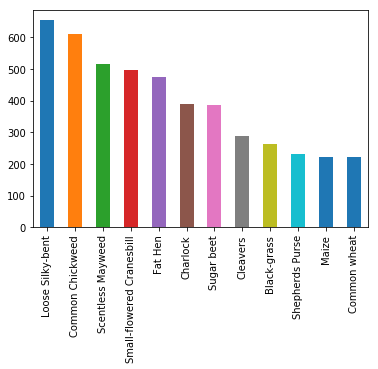

In [9]:
# Print the distribution of training images for ever classes
training_labels[0].value_counts().plot(kind='bar')

In [10]:
#Splitting training data into train and validation. take 10% of the training data randomly to be validation data

train = training_images/255 # Normalize input [0...255] to [0...1]

x_train,x_val,y_train,y_val = train_test_split(train,clear_labels,test_size=0.1,stratify=clear_labels)
print('Train Shape: {}'.format(x_train.shape))
print('Validation Shape: {}'.format(x_val.shape))

Train Shape: (4275, 70, 70, 3)
Validation Shape: (475, 70, 70, 3)


In [11]:
# Define our CNN Model
 
def CNNmodel():
    model = Sequential()
    model.add(Conv2D(filters=64, kernel_size=(5, 5), input_shape=(scale, scale, 3), activation='relu'))
    model.add(BatchNormalization(axis=3))
    model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization(axis=3))
    model.add(Dropout(0.1))

    model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
    model.add(BatchNormalization(axis=3))
    model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization(axis=3))
    model.add(Dropout(0.1))

    model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
    model.add(BatchNormalization(axis=3))
    model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization(axis=3))
    model.add(Dropout(0.1))

    model.add(Flatten())

    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(classes, activation='softmax'))
    
    return model

model1 = CNNmodel()
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 66, 66, 64)        4864      
_________________________________________________________________
batch_normalization_1 (Batch (None, 66, 66, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 64)        102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 31, 31, 64)        256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 27, 27, 128)       204928    
__________

In [15]:
# compile model
model1.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

batch_size = 100
epochs = 35


# fit model
history1 = model1.fit(x_train, y_train, batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_val, y_val)
                    )
                
# model evaluation               
model1.evaluate(x_train, y_train)
model1.evaluate(x_val, y_val)

Train on 4275 samples, validate on 475 samples
Epoch 1/35
4275/4275 [==============================] - 641s 150ms/step - loss: 2.4750 - acc: 0.3099 - val_loss: 8.4724 - val_acc: 0.2526
Epoch 2/35
4275/4275 [==============================] - 689s 161ms/step - loss: 1.7619 - acc: 0.4730 - val_loss: 9.4433 - val_acc: 0.2421
Epoch 3/35
4275/4275 [==============================] - 710s 166ms/step - loss: 1.2838 - acc: 0.6030 - val_loss: 5.0332 - val_acc: 0.4337
Epoch 4/35
4275/4275 [==============================] - 730s 171ms/step - loss: 1.0288 - acc: 0.6732 - val_loss: 6.6546 - val_acc: 0.3642
Epoch 5/35
4275/4275 [==============================] - 703s 165ms/step - loss: 0.8321 - acc: 0.7324 - val_loss: 3.4047 - val_acc: 0.5137
Epoch 6/35
4275/4275 [==============================] - 688s 161ms/step - loss: 0.6865 - acc: 0.7738 - val_loss: 6.5970 - val_acc: 0.1474
Epoch 7/35
4275/4275 [==============================] - 718s 168ms/step - loss: 0.6271 - acc: 0.7892 - val_loss: 2.2550 - val

[1.7961166805970041, 0.6652631565144188]

Text(0.5,1,'Accuracy Curves')

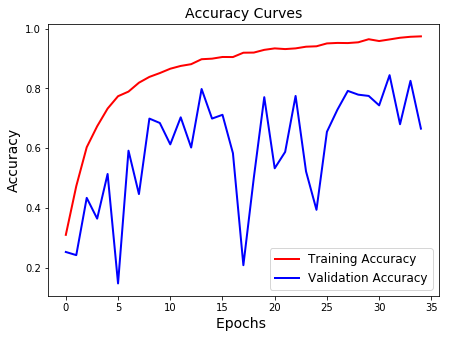

In [18]:
# Accuracy Curves red lines fro training and blue line for validatioan
plt.figure(figsize=[7,5])
plt.plot(history1.history['acc'],'r',linewidth=2.0)
plt.plot(history1.history['val_acc'],'b',linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=12)
plt.xlabel('Epochs ',fontsize=14)
plt.ylabel('Accuracy',fontsize=14)
plt.title('Accuracy Curves',fontsize=14)

Text(0.5,1,'Loss Curves')

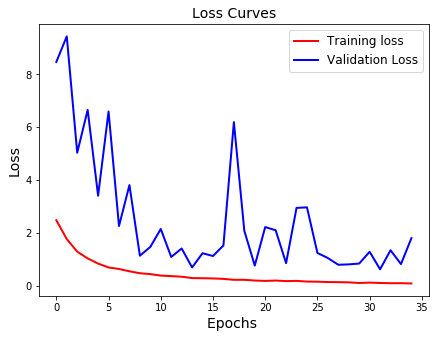

In [19]:
# Loss Curves red lines fro training and blue line for validatioan
plt.figure(figsize=[7,5])
plt.plot(histoty.history['loss'],'r',linewidth=2.0)
plt.plot(histoty.history['val_loss'],'b',linewidth=2.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=12)
plt.xlabel('Epochs ',fontsize=14)
plt.ylabel('Loss',fontsize=14)
plt.title('Loss Curves',fontsize=14)

In [12]:
#Data Augmentation
datagen = ImageDataGenerator(
    rotation_range = 180, # randomly rotate images in the range
    zoom_range = 0.1, # Randomly zoom image 
    shear_range=0.,
    width_shift_range = 0.1, # randomly shift images horizontally
    height_shift_range = 0.1, # randomly shift images vertically 
    horizontal_flip = True, # randomly flip images horizontally
    vertical_flip = True # randomly flip images vertically
)
datagen.fit(x_train)

In [13]:
model2 = CNNmodel()

# compile model
model2.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

batch_size = 100
epochs = 35

#Set two callbacks which are learning rate reduction and saving the best weight 
# learning rate reduction
reduce_lr = ReduceLROnPlateau(monitor='val_acc', 
                        patience=3, 
                        verbose=1, 
                        factor=0.4, 
                        min_lr=0.00001)

# checkpoints
filepath='weights.best_{epoch:02d}-{val_acc:.2f}.h5'
checkpoints = ModelCheckpoint(filepath, monitor='val_acc', 
                              verbose=1, save_best_only=True, mode='max')
filepath='weights.last_auto4.h5'
checkpoints_full = ModelCheckpoint(filepath, monitor='val_acc', 
                                 verbose=1, save_best_only=False, mode='max')

# all callbacks
callbacks_list = [checkpoints, reduce_lr, checkpoints_full]

# fit model
histoty = model2.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                            epochs=epochs,
                            validation_data=(x_val, y_val),
                            steps_per_epoch=int(np.ceil(x_train.shape[0] / float(batch_size))),
                            callbacks=callbacks_list
                           )




Epoch 1/35
43/43 [==============================] - 743s 17s/step - loss: 2.7011 - acc: 0.2605 - val_loss: 10.0895 - val_acc: 0.0611

Epoch 00001: val_acc improved from -inf to 0.06105, saving model to weights.best_01-0.06.h5

Epoch 00001: saving model to weights.last_auto4.h5
Epoch 2/35
43/43 [==============================] - 688s 16s/step - loss: 2.0383 - acc: 0.3954 - val_loss: 8.0576 - val_acc: 0.2105

Epoch 00002: val_acc improved from 0.06105 to 0.21053, saving model to weights.best_02-0.21.h5

Epoch 00002: saving model to weights.last_auto4.h5
Epoch 3/35
43/43 [==============================] - 674s 16s/step - loss: 1.6377 - acc: 0.4858 - val_loss: 9.9341 - val_acc: 0.2484

Epoch 00003: val_acc improved from 0.21053 to 0.24842, saving model to weights.best_03-0.25.h5

Epoch 00003: saving model to weights.last_auto4.h5
Epoch 4/35
43/43 [==============================] - 676s 16s/step - loss: 1.3792 - acc: 0.5667 - val_loss: 5.1654 - val_acc: 0.3811

Epoch 00004: val_acc improved

Epoch 32/35
43/43 [==============================] - 740s 17s/step - loss: 0.2804 - acc: 0.8985 - val_loss: 0.2613 - val_acc: 0.9137

Epoch 00032: val_acc did not improve from 0.91368

Epoch 00032: ReduceLROnPlateau reducing learning rate to 1.0240000847261399e-05.

Epoch 00032: saving model to weights.last_auto4.h5
Epoch 33/35
43/43 [==============================] - 705s 16s/step - loss: 0.2788 - acc: 0.9019 - val_loss: 0.2689 - val_acc: 0.9116

Epoch 00033: val_acc did not improve from 0.91368

Epoch 00033: saving model to weights.last_auto4.h5
Epoch 34/35
43/43 [==============================] - 718s 17s/step - loss: 0.2676 - acc: 0.8994 - val_loss: 0.2845 - val_acc: 0.9032

Epoch 00034: val_acc did not improve from 0.91368

Epoch 00034: saving model to weights.last_auto4.h5
Epoch 35/35
43/43 [==============================] - 799s 19s/step - loss: 0.2668 - acc: 0.9057 - val_loss: 0.2717 - val_acc: 0.9116

Epoch 00035: val_acc did not improve from 0.91368

Epoch 00035: ReduceLROnPl

In [14]:
model2.evaluate(x_train, y_train)
model2.evaluate(x_val, y_val)

475/475 [==============================] - 30s 64ms/step


[0.2716516876220703, 0.9115789477448715]

Text(0.5,1,'Accuracy Curves')

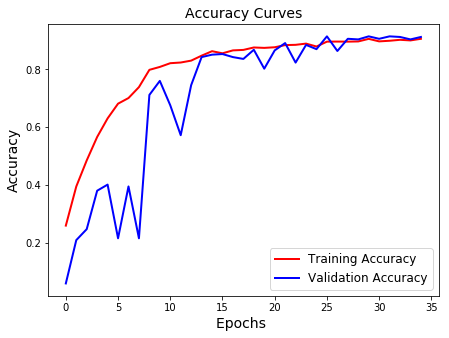

In [15]:
# Accuracy Curves
plt.figure(figsize=[7,5])
plt.plot(histoty.history['acc'],'r',linewidth=2.0)
plt.plot(histoty.history['val_acc'],'b',linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=12)
plt.xlabel('Epochs ',fontsize=14)
plt.ylabel('Accuracy',fontsize=14)
plt.title('Accuracy Curves',fontsize=14)

Text(0.5,1,'Loss Curves')

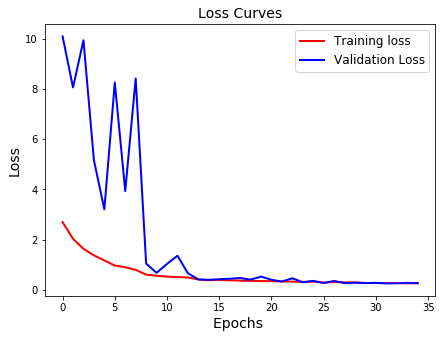

In [16]:
# Loss Curves
plt.figure(figsize=[7,5])
plt.plot(histoty.history['loss'],'r',linewidth=2.0)
plt.plot(histoty.history['val_loss'],'b',linewidth=2.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=12)
plt.xlabel('Epochs ',fontsize=14)
plt.ylabel('Loss',fontsize=14)
plt.title('Loss Curves',fontsize=14)

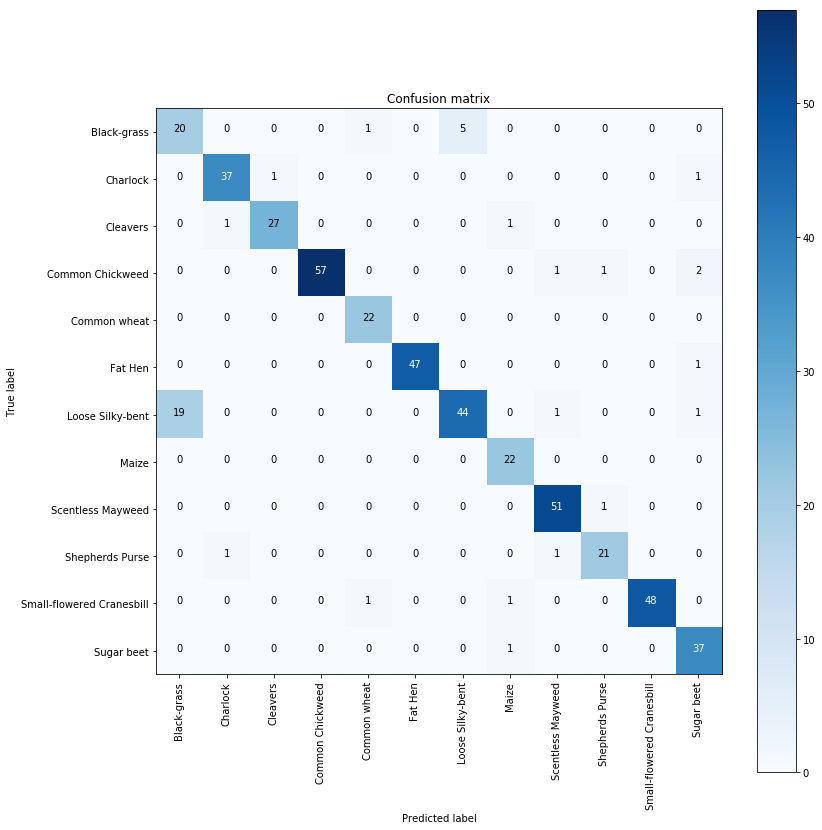

In [18]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    fig = plt.figure(figsize=(12,12))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
prediction = model2.predict(x_val)
labels_pred = np.argmax(prediction, axis = 1) 
right_pred = np.argmax(y_val, axis = 1) 

# confusion matrix
confusionMTX = confusion_matrix(right_pred, labels_pred) 

# plot the confusion matrix
plot_confusion_matrix(confusionMTX, classes = labels.classes_)

In [22]:
test_path = '/Users/apple/Documents/SEM2 2018/Big Data n Project/Project 2/Image Classifier/test/*.png'
images = glob(test_path)

test_images = []
tests = []
#set the number of images in testing data
count=1
num = len(images)

# Obtain images and resizing, obtain labels
for i in images:
    print(str(count)+'/'+str(num),end='\r')
    tests.append(i.split('/')[-1]) # Images id's
    test_images.append(cv2.resize(cv2.imread(i),(scale,scale)))
    count = count + 1

test_images = np.asarray(test_images) # Train images set 


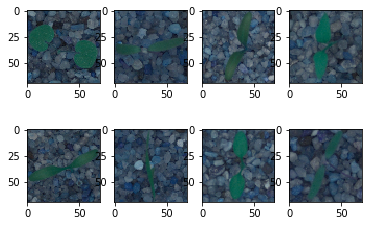

In [23]:
# Print out some images as examples
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(test_images[i])

In [24]:
new_test=test_images/255
prediction = model2.predict(new_test)

# Write prediction result to a file
pred_code = np.argmax(prediction,axis=1)
pred_labels = labels.classes_[pred_code]

result = {'file':tests,'species':pred_labels}
result = pd.DataFrame(result)
result.to_csv("Prediction_to_kaggle.csv",index=False)
print('Save prediction as Prediction.csv')

Save prediction as Prediction.csv
